# A3Lab - Hermione

In [1]:
# esse path append é importante para que os módulos da Hermione funcionem no notebook
import sys
sys.path.append("../../")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re
import string

from ml.data_source.spreadsheet import Spreadsheet
from ml.preprocessing.preprocessing import Preprocessing
from ml.model.trainer import TrainerSklearn
from ml.model.metrics import Metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = Spreadsheet().get_data('../../../data/raw/train.csv')
df = df.dropna()

In [6]:
df = df.reset_index().drop(columns=["index"])

In [7]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((499, 5), (215, 5), (499,), (215,))

# Visulization

A hermione tem vários métodos para visualização estática e interativa.

In [9]:
from ml.visualization.visualization import Visualization

In [10]:
Visualization.bar?

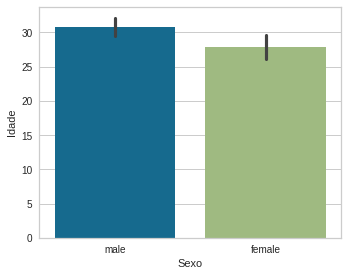

In [11]:
Visualization.bar(df["Sex"], df["Age"], xlabel="Sexo", ylabel="Idade", est=np.mean)

In [12]:
Visualization.bar_interactive?

In [13]:
Visualization.bar_interactive(df, "Sex", "Age", xlabel="Sexo", ylabel="Idade", hover=["Pclass"])

alt.Chart(...)

In [14]:
Visualization.scatter_interactive(df, "Age", "Fare", xlabel="Sexo", ylabel="Idade", hover=["Pclass"], color='Survived',size="Pclass")

alt.Chart(...)

In [15]:
Visualization.line_interactive?

In [16]:
Visualization.line_interactive(df, "Age", "Fare", xlabel="Idade", ylabel="Fare", hover=["Pclass"])

alt.Chart(...)

# Normalization

In [17]:
from ml.preprocessing.normalization import Normalizer

In [18]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
X_train["Age"].describe()

count    499.000000
mean      29.263046
std       13.965008
min        0.420000
25%       20.500000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
X_test["Age"].describe()

count    215.000000
mean      30.711209
std       15.740423
min        0.750000
25%       20.250000
50%       29.000000
75%       40.000000
max       74.000000
Name: Age, dtype: float64

In [21]:
norm = Normalizer(norm_cols={"zscore":["Age"]})

In [22]:
#No dado de treino, eu treino o zcore e aplico a normalização
norm.fit(X_train[["Age"]])
X_train[["Age"]] = norm.transform(X_train[["Age"]])

In [23]:
#No dado de teste, temos só que aplicar o objeto treinado
X_test[["Age"]] = norm.transform(X_test[["Age"]])

In [24]:
X_train["Age"].describe()

count    4.990000e+02
mean     7.831633e-17
std      1.000000e+00
min     -2.065380e+00
25%     -6.275003e-01
50%     -9.044364e-02
75%      6.256319e-01
max      3.633149e+00
Name: Age, dtype: float64

In [25]:
X_test["Age"].describe()

count    215.000000
mean       0.103699
std        1.127133
min       -2.041749
25%       -0.645402
50%       -0.018836
75%        0.768847
max        3.203504
Name: Age, dtype: float64

# Text Vectorizer

## Bag of words

### Temos um dicionário de todas as palavras únicas e cada palavra está associada a um índice
<img src="../../../data/img/dic.png">

### Cada frase será representada pelo tamanho do dicionário. Se a palavra daquele indice aparece na frase, marco como 1
<img src="../../../data/img/example.png">

In [26]:
from ml.preprocessing.text_vectorizer import TextVectorizer

In [27]:
vector_text = TextVectorizer(vectorizer_cols = {'bag_of_words' : ['Name']})

In [28]:
df = df.head(100)

In [29]:
vector_text.fit(df) 

In [30]:
df = vector_text.transform(df) 

In [35]:
features = vector_text.vectorizers_fitted["bag_of_words"]["Name"].get_feature_names()
len(features)

257

In [45]:
index_row = 10
df.loc[index_row]

Survived                                                             1
Pclass                                                               1
Sex                                                             female
Age                                                               58.0
Fare                                                             26.55
Name                                          Bonnell, Miss. Elizabeth
Name_bag_of_words    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 10, dtype: object

In [46]:
df_temp = pd.DataFrame(df.loc[index_row, "Name_bag_of_words"], index=features)

In [47]:
df_temp[df_temp[0] == 1]

,0
bonnell,1
elizabeth,1
miss,1
